# Métricas

## Matriz de confusión

Matriz de confusión sin normalizar
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
Matriz de confusión normalizada
[[1.   0.   0.  ]
 [0.   0.94 0.06]
 [0.   0.   1.  ]]


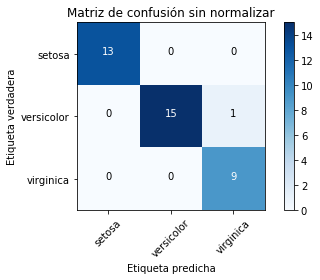

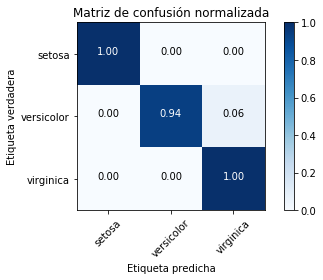

In [8]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier 

# Importamos dataset iris de scikitlearn
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Dividimos en train test el conjunto
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Corremos un clasificador
classifier = DecisionTreeClassifier()
y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Matriz de confusión',
                          cmap=plt.cm.Blues):
    """
    Esta función de scikit-learn imprime y plotea 
    la matriz de confusión pasada por parámetro. 
    Si se le pasa por parámetro 
    `normalize=True`, se le aplicará una normalización.

    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de confusión normalizada")
    else:
        print('Matriz de confusión sin normalizar')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Etiqueta verdadera')
    plt.xlabel('Etiqueta predicha')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Matriz de confusión sin normalizar')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Matriz de confusión normalizada')

plt.show()

## GridSeach 

In [9]:
from sklearn.datasets import load_boston
boston = load_boston()

#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(boston.data,
                                                    boston.target,
                                                    test_size=0.25,
                                                    random_state=33)

In [13]:
boston

{'data': array([[6.32e-03, 1.80e+01, 2.31e+00, ..., 1.53e+01, 3.97e+02, 4.98e+00],
        [2.73e-02, 0.00e+00, 7.07e+00, ..., 1.78e+01, 3.97e+02, 9.14e+00],
        [2.73e-02, 0.00e+00, 7.07e+00, ..., 1.78e+01, 3.93e+02, 4.03e+00],
        ...,
        [6.08e-02, 0.00e+00, 1.19e+01, ..., 2.10e+01, 3.97e+02, 5.64e+00],
        [1.10e-01, 0.00e+00, 1.19e+01, ..., 2.10e+01, 3.93e+02, 6.48e+00],
        [4.74e-02, 0.00e+00, 1.19e+01, ..., 2.10e+01, 3.97e+02, 7.88e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
        19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
param_grid = [
    {'max_depth': [2, 3, 4], 'max_features': [2, 4, 6, 8]},
]


In [14]:
tree_reg = DecisionTreeRegressor()
grid_search = GridSearchCV(tree_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', 
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'max_depth': [2, 3, 4],
                          'max_features': [2, 4, 6, 8]}],
             pre_dispatch='2*n_jobs', refit=Tru

## Propiedades de GridSearch

In [15]:
grid_search.best_params_

{'max_depth': 4, 'max_features': 8}

In [16]:
grid_search.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=8, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [20]:
grid_search.cv_results_

{'mean_fit_time': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'std_fit_time': array([4.33e-04, 2.62e-04, 8.47e-05, 6.75e-05, 2.11e-05, 3.24e-05,
        8.76e-05, 8.85e-05, 5.07e-05, 7.02e-05, 5.80e-05, 3.04e-04]),
 'mean_score_time': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'std_score_time': array([8.63e-04, 8.48e-05, 3.12e-04, 3.98e-05, 1.01e-05, 2.35e-05,
        8.34e-05, 1.94e-04, 3.13e-05, 3.95e-05, 5.37e-05, 5.05e-05]),
 'param_max_depth': masked_array(data=[2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_features': masked_array(data=[2, 4, 6, 8, 2, 4, 6, 8, 2, 4, 6, 8],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 2, 

In [17]:
grid_search.cv_results_['mean_train_score']

array([-48.53, -32.26, -32.11, -26.57, -30.2 , -25.4 , -20.41, -16.81,
       -23.56, -13.29, -12.52, -12.24])

In [18]:
np.sqrt(-grid_search.cv_results_['mean_train_score'])

array([6.97, 5.68, 5.67, 5.16, 5.5 , 5.04, 4.52, 4.1 , 4.85, 3.65, 3.54,
       3.5 ])

In [21]:
np.sqrt(-grid_search.cv_results_['mean_test_score'])

array([7.52, 6.64, 6.54, 5.94, 6.31, 5.61, 4.86, 4.71, 6.62, 5.09, 6.02,
       4.46])

## RandomizedSearch

In [22]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

param_grid = {'max_depth': sp_randint(2, 4), 'max_features': sp_randint(2, 8)}


In [24]:
tree_reg = DecisionTreeRegressor()
rand_search = RandomizedSearchCV(tree_reg, param_distributions=param_grid, cv=5,
                                 scoring='neg_mean_squared_error',
                                 n_iter=10,
                                 return_train_score=True)

rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort='deprecated',
                                                   random_state=None,
                                                   splitter='best'),
                   iid='d

In [26]:
rand_search.best_params_

{'max_depth': 3, 'max_features': 6}

In [27]:
rand_search.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=6, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [28]:
np.sqrt(-rand_search.cv_results_['mean_train_score'])

array([6.22, 4.31, 4.71, 4.35, 4.74, 5.31, 4.62, 5.44, 5.81, 5.87])

In [29]:
np.sqrt(-rand_search.cv_results_['mean_test_score'])

array([6.47, 6.17, 5.58, 4.89, 5.16, 5.42, 4.86, 6.36, 6.56, 6.63])

In [30]:
# Comparamos los resultados entre Randomizedsearch y GridSearch
print("Promedio GridSearch RMSE: ", np.sqrt(-grid_search.cv_results_['mean_test_score']).mean())
print("Promedio RandomizedSearch RMSE: ", np.sqrt(-rand_search.cv_results_['mean_test_score']).mean())

Promedio GridSearch RMSE:  5.859783660376
Promedio RandomizedSearch RMSE:  5.809725863151752


## Cambiando el scoring en GridSearch

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
param_grid = [
    {'max_depth': [2, 3, 4], 'max_features': [2, 4, 6, 8]},
]
tree_reg = DecisionTreeRegressor()
grid_search_r2 = GridSearchCV(tree_reg, param_grid, cv=5,
                           scoring='r2', return_train_score=True)
grid_search_r2.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'max_depth': [2, 3, 4],
                          'max_features': [2, 4, 6, 8]}],
             pre_dispatch='2*n_jobs', refit=Tru

## Evaluación en test set

In [32]:
y_pred = grid_search.predict(X_test)

In [33]:
from sklearn.metrics import mean_squared_error

In [34]:
np.sqrt(mean_squared_error(y_test, y_pred))

5.505635334643258

In [35]:
y_pred = rand_search.predict(X_test)

In [36]:
np.sqrt(mean_squared_error(y_test, y_pred))

5.263380588063817

In [39]:
y_pred = grid_search_r2.predict(X_test)

In [40]:
np.sqrt(mean_squared_error(y_test, y_pred))

4.851223269397861

## Oversampling 

Ejemplo extra de oversample

In [44]:
# Authors: Fernando Nogueira
#          Christos Aridas
#          Guillaume Lemaitre <g.lemaitre58@gmail.com>
# License: MIT

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

from imblearn.over_sampling import SMOTE

print(__doc__)


def plot_resampling(ax, X, y, title):
    c0 = ax.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5)
    c1 = ax.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5)
    ax.set_title(title)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.set_xlim([-6, 8])
    ax.set_ylim([-6, 6])

    return c0, c1


# Generate the dataset
X, y = make_classification(n_classes=2, class_sep=2, weights=[0.3, 0.7],
                           n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1,
                           n_samples=80, random_state=10)

# Instanciate a PCA object for the sake of easy visualisation
pca = PCA(n_components=2)
# Fit and transform x to visualise inside a 2D feature space
X_vis = pca.fit_transform(X)

# Apply regular SMOTE
kind = ['regular', 'borderline1', 'borderline2', 'svm']
sm = [SMOTE(kind=k) for k in kind]
X_resampled = []
y_resampled = []
X_res_vis = []
for method in sm:
    X_res, y_res = method.fit_sample(X, y)
    X_resampled.append(X_res)
    y_resampled.append(y_res)
    X_res_vis.append(pca.transform(X_res))

# Two subplots, unpack the axes array immediately
f, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2)
# Remove axis for second plot
ax2.axis('off')
ax_res = [ax3, ax4, ax5, ax6]

c0, c1 = plot_resampling(ax1, X_vis, y, 'Original set')
for i in range(len(kind)):
    plot_resampling(ax_res[i], X_res_vis[i], y_resampled[i],
                    'SMOTE {}'.format(kind[i]))

ax2.legend((c0, c1), ('Class #0', 'Class #1'), loc='center',
           ncol=1, labelspacing=0.)
plt.tight_layout()
plt.show()

Automatically created module for IPython interactive environment


TypeError: __init__() got an unexpected keyword argument 'kind'